In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud   import WordCloud, STOPWORDS
import re, string
import collections

In [117]:
data = pd.read_csv('Tweets.csv')
data.shape

(14640, 15)

In [118]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

Text(0, 0.5, 'Porcentaje')

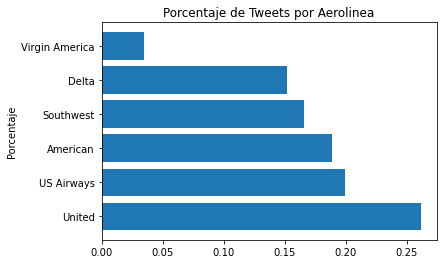

In [119]:
fig, ax = plt.subplots()
ax.barh(data['airline'].value_counts(normalize = True).index,data['airline'].value_counts(normalize = True).values)
ax.set_title("Porcentaje de Tweets por Aerolinea")
ax.set_ylabel("Porcentaje")



In [120]:
data['tweet_long'] = data['text'].apply(lambda x : len(x))


In [121]:
data['tweet_long'].describe()

count    14640.000000
mean       103.822063
std         36.277339
min         12.000000
25%         77.000000
50%        114.000000
75%        136.000000
max        186.000000
Name: tweet_long, dtype: float64

In [122]:
data['tweet_long'].value_counts()

140    816
139    658
138    507
137    433
136    377
      ... 
167      2
176      1
170      1
186      1
166      1
Name: tweet_long, Length: 159, dtype: int64

Text(0.5, 0.98, 'Distribución de la Longitud de los Tweets')

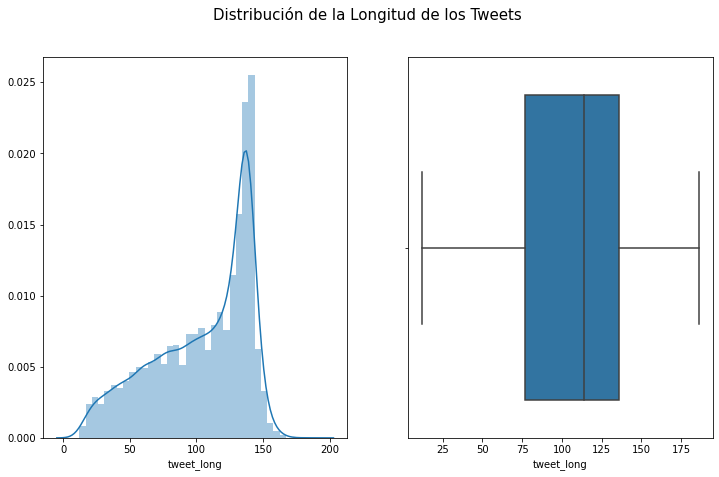

In [123]:
fig, ax = plt.subplots(1,2,figsize=(12,7))
sns.distplot(data['tweet_long'],ax=ax[0])
sns.boxplot(data['tweet_long'],orient='h',ax=ax[1])
fig.suptitle("Distribución de la Longitud de los Tweets", fontsize=15)

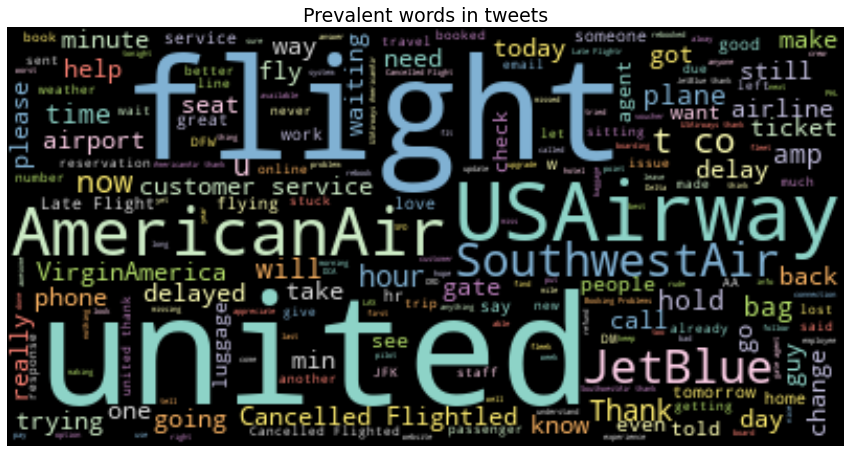

In [124]:
lista_off=['united','usairways','americanair','southwestair','jetblue','flight']
text = ",".join(review for review in data.text if review not in lista_off)
wordcloud = WordCloud(max_words=200, colormap='Set3',background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.title('Prevalent words in tweets',fontsize=19)
plt.show()

In [125]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

data['text_clean'] = data['text'].apply(lambda x : clean_text(x))

In [126]:
data['text_clean']

0                         virginamerica what dhepburn said
1        virginamerica plus youve added commercials to ...
2        virginamerica i didnt today must mean i need t...
3        virginamerica its really aggressive to blast o...
4        virginamerica and its a really big bad thing a...
                               ...                        
14635    americanair thank you we got on a different fl...
14636    americanair leaving over  minutes late flight ...
14637       americanair please bring american airlines to 
14638    americanair you have my money you change my fl...
14639    americanair we have  ppl so we need  know how ...
Name: text_clean, Length: 14640, dtype: object

In [142]:
%%time
tweet_list = [tweet for tweets in data['text_clean']]
list=[]
for tweet in tweet_list:
    words = tweet.split()
    for word in words:
        lista.append(word)


Wall time: 51.6 ms


In [138]:
pd.DataFrame(collections.Counter(lista).most_common(50),columns=['Palabra','Frecuencia']).style.background_gradient(cmap='Blues')

,Palabra,Frecuencia
0,to,8640
1,the,6047
2,i,5368
3,a,4475
4,united,4116
5,you,4103
6,for,3988
7,flight,3867
8,on,3777
9,and,3709


In [129]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

X_train = vectorizer.fit_transform(data['text'].values)

In [130]:
X_train

<14640x15051 sparse matrix of type '<class 'numpy.int64'>'
	with 234281 stored elements in Compressed Sparse Row format>

In [131]:
pd.DataFrame(X_train.todense(),columns=vectorizer.get_feature_names()).describe()

,00,000,000114,000419,000ft,000lbs,0011,0016,00a,00am,...,zrh_airport,zsdgzydnde,zsuztnaijq,ztrdwv0n4l,zukes,zurich,zv2pt6trk9,zv6cfpohl5,zvfmxnuelj,zzps5ywve2
count,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,...,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000
mean,0.000956,0.002117,0.000068,0.000068,0.000068,0.000068,0.000068,0.000205,0.000068,0.000137,...,0.000068,0.000068,0.000068,0.000068,0.000068,0.000342,0.000068,0.000068,0.000068,0.000068
std,0.030910,0.047432,0.008265,0.008265,0.008265,0.008265,0.008265,0.024794,0.008265,0.011688,...,0.008265,0.008265,0.008265,0.008265,0.008265,0.018478,0.008265,0.008265,0.008265,0.008265
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
